In [1]:
#Import Dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [8]:
file='crypto_data.csv'
CC=pd.read_csv(file, index_col=0)
CC.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [19]:
#Keep only currencies that are trading, then drop 'IsTrading' from DF
CC1 = CC[CC.IsTrading == True]
#CC1.head(120)
CC2=CC1.drop(columns=['IsTrading'])
CC2.head()
#CC2.shape

(1144, 5)

In [20]:
#Remove any rows with null values
CC3=CC2.dropna()
#CC3.shape
CC3.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [25]:
#Drop coins that have nothing mined
CC4=CC3[CC3.TotalCoinsMined > 0]
CC4.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [26]:
#Drop coin name column
CC5=CC4.drop(columns=['CoinName'])

In [32]:
#Get values with get dummies
CC6=pd.get_dummies(CC5, columns=['Algorithm', 'ProofType'])
CC6.shape

(532, 98)

In [34]:
#Standardize values
scaler =StandardScaler()
CC_Scaled = scaler.fit_transform(CC6)
CC_Scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [44]:
#Preserve 90% of the explained variance using the numbers in the instructions
pca=PCA(n_components=.9)
CC_pca=pca.fit_transform(CC_Scaled)
CC_pca.shape

(532, 74)

In [45]:
#Use the TSNE to further reduce dimensions
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(CC_pca)
tsne_features.shape

(532, 2)

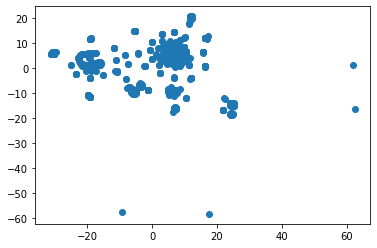

In [47]:
#Plot to look for clusters (not really observed)
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()